In [56]:
import geopandas
from matplotlib import pyplot as plt
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

## read datasets

In [57]:
area=pd.read_csv('datasets/area.csv')

In [58]:
geo_data=geopandas.read_file('datasets/geo_maps/gadm36_IND_1.shp')

In [59]:
geo_data.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IND,India,IND.1_1,Andaman and Nicobar,Andaman & Nicobar Islands|Andaman et Nicobar|I...,None,Union Territor,Union Territory,None,IN.AN,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,IND,India,IND.2_1,Andhra Pradesh,None,None,State,State,None,IN.AP,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13..."
2,IND,India,IND.3_1,Arunachal Pradesh,Agence de la Frontière du Nord-Est(French-obso...,None,State,State,None,IN.AR,"POLYGON ((94.21111 27.61084, 94.21351 27.60442..."
3,IND,India,IND.4_1,Assam,None,None,State,State,None,IN.AS,"POLYGON ((89.83875 25.96647, 89.83814 25.96793..."
4,IND,India,IND.5_1,Bihar,None,None,State,State,None,IN.BR,"MULTIPOLYGON (((87.26292 27.85072, 87.25249 27..."


In [60]:
crop_data=pd.read_csv('datasets/crop_production.csv')

In [61]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


## find common-states
- basically we have to make names of states same in both datasets
    - this way we can merge datasets on 'state-names'

In [62]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [63]:
CROP_STATES=list(crop_data.State_Name.unique())

In [64]:
GEO_STATES=list(geo_data.NAME_1.unique())

In [65]:
print('total states in crop-production dataset',len(CROP_STATES))

33

In [66]:
print('total states in geo-json dataset',len(GEO_STATES))

36

#### manual changes
- we better change geo-data states as there is less number of entries[so it is fast]
- Andaman and Nicobar >> Andaman and Nicobar Islands [in geo-data]
- 'Telangana' >> 'Telangana '[in geo-data] :: minor difference of extra space at the end

In [67]:
geo_data.iloc[GEO_STATES.index('Andaman and Nicobar'),3]='Andaman and Nicobar Islands'
geo_data.iloc[GEO_STATES.index('Telangana'),3]='Telangana '
data=pd.merge(geo_data,area,how='inner',on='NAME_1')

## spatial plotter
- it is a simple func that
    - takes dataset and label on which we have to plot
    - returns a simple plot with legend

In [122]:
def geo_plot(dataset,label):
    # global merged_data
    ax=dataset.plot(
        column=label,
        legend=True,
        figsize=(12,8),
        cmap='winter',
        edgecolor='black',
        missing_kwds={
            'color':'white',
            'hatch':'///',
            'edgecolor':'black'
        },
        )
    ax.set_axis_off()
    ax.set_title(label)
    # plt.show()
    return None

# Production and Area analysis[State-Wise]
- what is the situation of states by their total production over all these 19 years, normalized by their cultivation area?
    - this considers three cases:
        - normalized by cultivatoin area
        - without normalization
        - normalized by state area
- what is the situation year by year?

## Over all years

##### normalized by cultivation area: over 19 years

In [69]:
prod_area_df=crop_data.groupby(by = crop_data.State_Name)['Area','Production'].sum()

In [70]:
foo_df1=pd.DataFrame({'NAME_1':prod_area_df.index,'Prod-by-Area':prod_area_df.Production/prod_area_df.Area})

In [71]:
merged_data=pd.merge(geo_data,foo_df1,on='NAME_1',how='outer')

Spatial plot: Production-by-Area[cultivation]
Over all 19 years


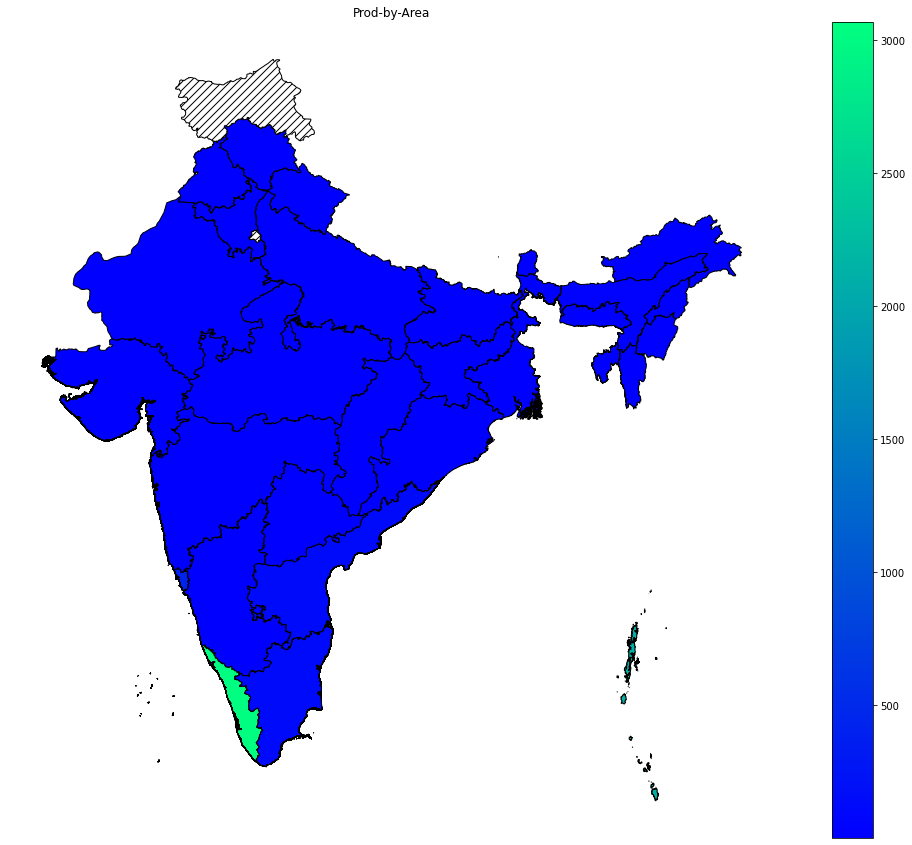

In [72]:
print(''.center(50,'='))
print('Spatial plot: Production-by-Area[cultivation]')
print('Over all 19 years')
print(''.center(50,'='))
geo_plot(merged_data,'Prod-by-Area')

**oservations**
- clearly Kerela is the top producer even after normalizing the production by area

##### without normalization: over 19 years

In [73]:
prod_df=crop_data.groupby(by = crop_data.State_Name)['Production','State_Name'].sum()

In [74]:
foo_df1=pd.DataFrame({'NAME_1':prod_df.index,'Production':prod_df.Production})

In [75]:
merged_data=pd.merge(geo_data,foo_df1,on='NAME_1',how='outer')

Spatial plot: Production
Over all 19 years


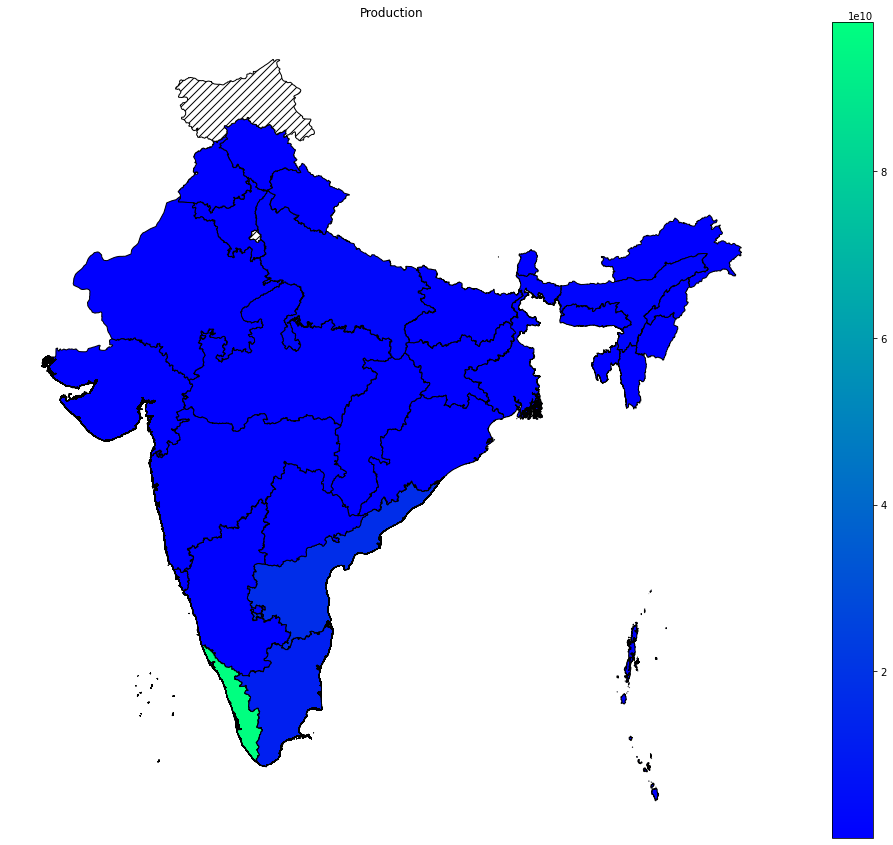

In [76]:
print(''.center(50,'='))
print('Spatial plot: Production')
print('Over all 19 years')
print(''.center(50,'='))
geo_plot(merged_data,'Production')

**oservations**
- clearly Kerela is the top producer without normalizing

##### normalize by state area: over 19 years

In [77]:
prod_df=crop_data.groupby(by = crop_data.State_Name)['Production','State_Name'].sum()

In [78]:
foo_df1=pd.DataFrame({'NAME_1':prod_df.index,'Production':prod_df.Production})

In [79]:
prod_by_state_area=pd.merge(foo_df1,area,on='NAME_1',how='inner')

In [80]:
foo_df1=pd.DataFrame({'NAME_1':prod_by_state_area.NAME_1,'Prod-by-State-Area':prod_by_state_area.Production/prod_by_state_area.Area})

In [81]:
merged_data=pd.merge(geo_data,foo_df1,on='NAME_1',how='outer')

Spatial plot: Prod-by-State-Area
Over all 19 years


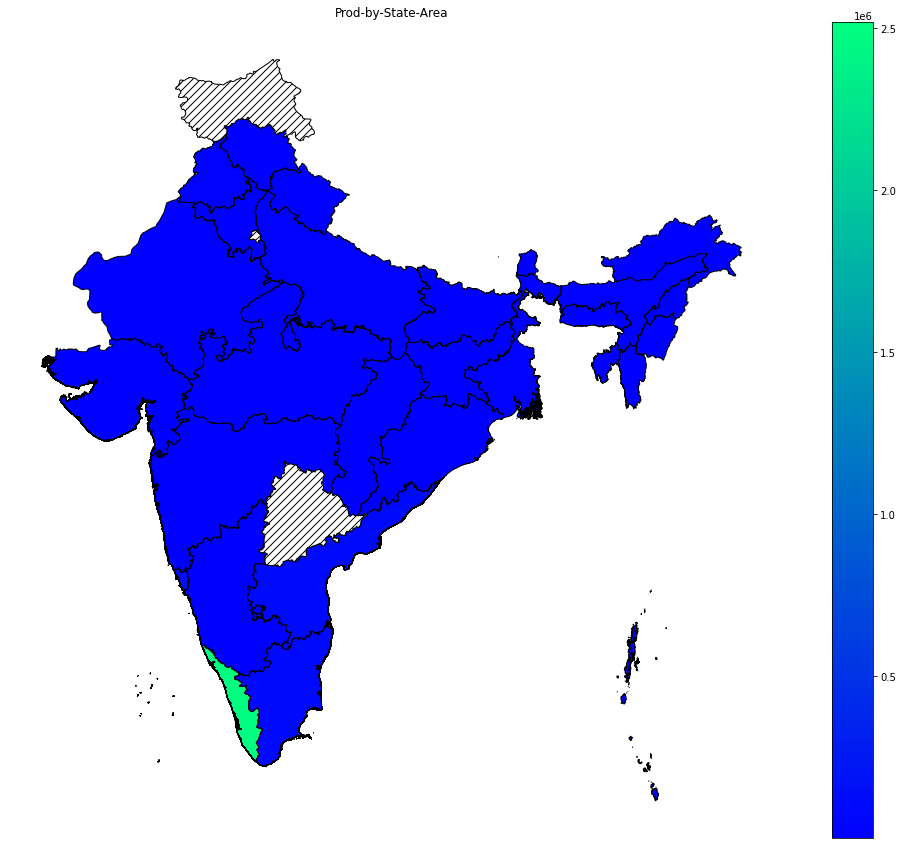

In [82]:
print(''.center(50,'='))
print('Spatial plot: Prod-by-State-Area')
print('Over all 19 years')
print(''.center(50,'='))
geo_plot(merged_data,'Prod-by-State-Area')

**oservations**
- clearly Kerela is the top producer when normaalized with state area

##### Conclusion over 19 years
- In all three cases `Kerela` is the top producer.

## Year by Year analysis

In [83]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [84]:
'''
input:
year: int; default=2000
type:[options available]
    - no-norm
    - norm-by-cult-area
    - norm-by-state-area

output:
return a spatial plot with meta info about it

use:
can be used to create spatial map for a given year and type
'''
def get_year_prod_plot(year=2000,type='no-norm'):

    global crop_data
    global geo_data
    global area

    foo_df2=crop_data[crop_data['Crop_Year']==year]

    if type=='no-norm':

        prod_df=foo_df2.groupby(by = foo_df2.State_Name)['Production','State_Name'].sum()
        
        foo_df1=pd.DataFrame({'NAME_1':prod_df.index,f'{type}':prod_df.Production})

        merged_data=pd.merge(geo_data,foo_df1,on='NAME_1',how='outer')

        print(''.center(50,'='))
        print(f'Spatial plot: {type}')
        print(f'for year {year}')
        print(''.center(50,'='))
        geo_plot(merged_data,type)
    
    elif type=='norm-by-cult-area':
        
        prod_area_df=foo_df2.groupby(by = foo_df2.State_Name)['Area','Production'].sum()
        foo_df1=pd.DataFrame({'NAME_1':prod_area_df.index,type:prod_area_df.Production/prod_area_df.Area})
        merged_data=pd.merge(geo_data,foo_df1,on='NAME_1',how='outer')


        print(''.center(50,'='))
        print(f'Spatial plot: {type}')
        print(f'for year {year}')
        print(''.center(50,'='))
        geo_plot(merged_data,type)

    elif type=='norm-by-state-area':

        prod_df=foo_df2.groupby(by = foo_df2.State_Name)['Production','State_Name'].sum()
        foo_df1=pd.DataFrame({'NAME_1':prod_df.index,'Production':prod_df.Production})
        prod_by_state_area=pd.merge(foo_df1,area,on='NAME_1',how='inner')
        foo_df1=pd.DataFrame({'NAME_1':prod_by_state_area.NAME_1,type:prod_by_state_area.Production/prod_by_state_area.Area})
        merged_data=pd.merge(geo_data,foo_df1,on='NAME_1',how='outer')

        print(''.center(50,'='))
        print(f'Spatial plot: {type}')
        print(f'for year {year}')
        print(''.center(50,'='))
        geo_plot(merged_data,type)
        
    else:
        print('not valid input')

Spatial plot: no-norm
for year 2014


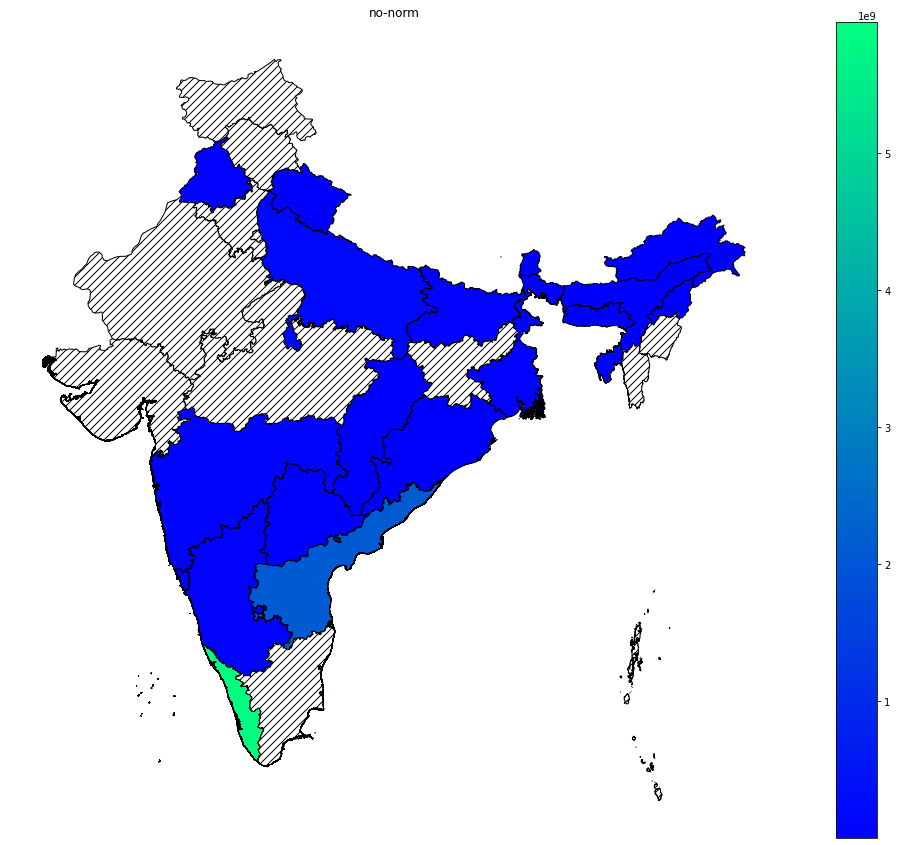

In [85]:
# for example
get_year_prod_plot(2014,'no-norm')

### create animated gifs for over 19 years

In [86]:
def get_annot_images(dataset,year,label):

    ax=dataset.plot(
        column=label,
        legend=True,
        figsize=(20,15),
        cmap='winter',
        edgecolor='black',
        missing_kwds={
            'color':'white',
            'hatch':'///',
            'edgecolor':'black'
        },
        )
    ax.set_axis_off()
    ax.set_title(label,fontdict={'fontsize': '25','fontweight' : '3'})
    ax.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    filepath = f'{year}_production_{label}.png'
    chart = ax.get_figure()
    chart.savefig(filepath, dpi=100) # could work with lower dpi to save resources
    
    return None

In [87]:
YEARS=list(crop_data['Crop_Year'].unique())
YEARS=sorted(YEARS)

In [ ]:
dir_name='animation-images'
if os.path.exists(dir_name):
    os.chdir(dir_name)
else:
    os.makedirs(dir_name)
    os.chdir(dir_name)

for year in YEARS:
    
    foo_df2=crop_data[crop_data['Crop_Year']==year]

    # for no-norm case
    prod_df=foo_df2.groupby(by = foo_df2.State_Name)['Production','State_Name'].sum()
    foo_df1=pd.DataFrame({'NAME_1':prod_df.index,'Without-Normalization':prod_df.Production})
    merged_data=pd.merge(geo_data,foo_df1,on='NAME_1',how='outer')
    get_annot_images(merged_data,year,'Without-Normalization')

    # for cult case
    prod_area_df=foo_df2.groupby(by = foo_df2.State_Name)['Area','Production'].sum()
    foo_df1=pd.DataFrame({'NAME_1':prod_area_df.index,'Normalization-with-Cultivation-Area':prod_area_df.Production/prod_area_df.Area})
    merged_data=pd.merge(geo_data,foo_df1,on='NAME_1',how='outer')
    get_annot_images(merged_data,year,'Normalization-with-Cultivation-Area')

    # for 

    prod_df=foo_df2.groupby(by = foo_df2.State_Name)['Production','State_Name'].sum()
    foo_df1=pd.DataFrame({'NAME_1':prod_df.index,'Production':prod_df.Production})
    prod_by_state_area=pd.merge(foo_df1,area,on='NAME_1',how='inner')
    foo_df1=pd.DataFrame({'NAME_1':prod_by_state_area.NAME_1,'Normalization-with-State-Area':prod_by_state_area.Production/prod_by_state_area.Area})
    merged_data=pd.merge(geo_data,foo_df1,on='NAME_1',how='outer')
    get_annot_images(merged_data,year,'Normalization-with-State-Area')
    
    print(year)    

In [ ]:
# note: if you don't run this line then directory structure is going to be not that good
# os.chdir('..')

# Season Spatial Analysis

In [121]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop,Cat_Crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Terr,Nuts,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Union Terr,Pulses,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Terr,Cereal,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Terr,Fruits,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Terr,Nuts,Nuts


In [93]:
SEASONS=list(crop_data.Season.unique())

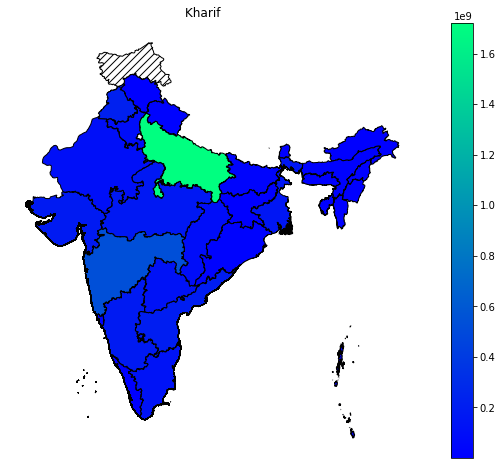

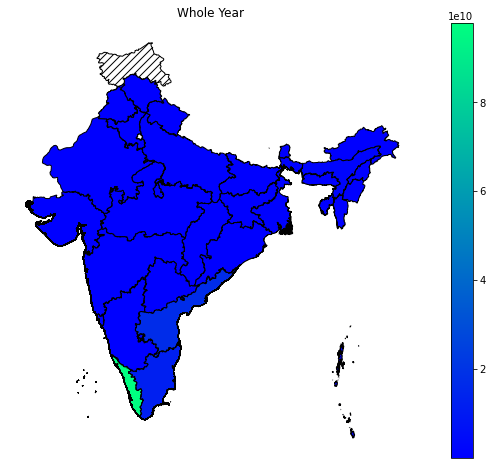

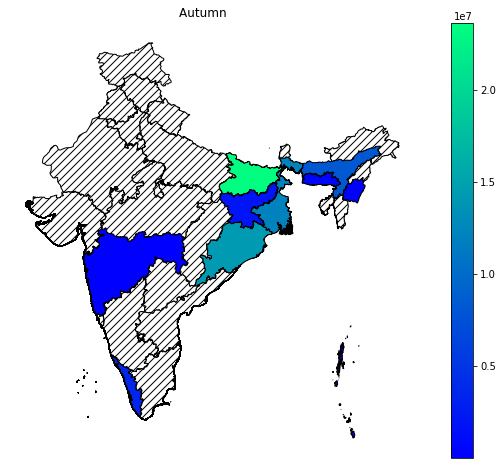

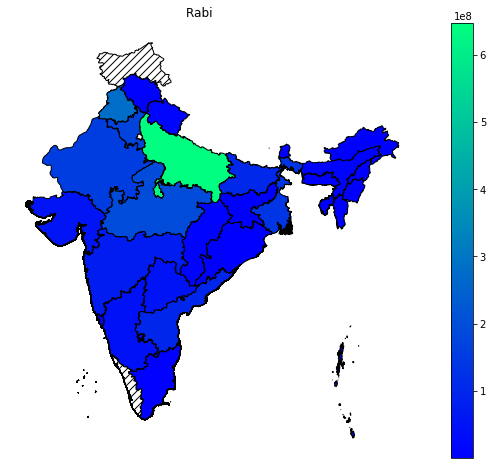

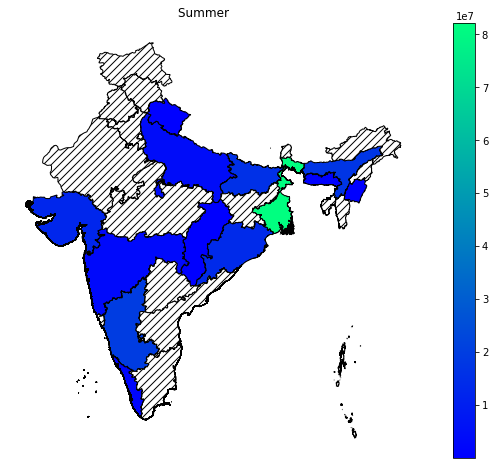

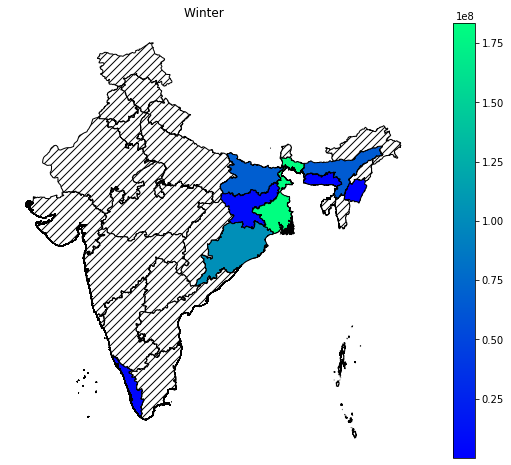

In [123]:
for season in SEASONS:
    temp_df=crop_data[crop_data.Season==season]

    foo_df1=temp_df.groupby(by='State_Name')['Production','State_Name'].sum()

    foo_df2=pd.DataFrame({'NAME_1':foo_df1.index,season:foo_df1.Production})

    merge_df=pd.merge(geo_data,foo_df2,on='NAME_1',how='outer')

    geo_plot(merge_df,season)

Observations:
- In India during Kharif season most of the land is cultivated in all States.
- On the other hand in winter season only a few states cultivate; some of them are
    - Orissa
    - WB
    - Kerela
- Note that states having water-border are cultivating in rare seasons like Autumn and Winter. Also these states have major yearly flowing river passing through them.

# Zone Wise analysis 

In [97]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


- create zones and crop category variables

In [99]:
'''
bit manual work :)
can be changed some states from one zone to another 
but it is what we decide
'''

north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']



In [100]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

crop_data['Zones'] = crop_data.apply(get_zonal_names, axis=1)
crop_data['Zones'].unique()


array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [104]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Terr,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Union Terr,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Terr,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Terr,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Terr,Nuts


In [117]:
ZONES=[
    'North Zone',
    'South Zone',
    'East Zone',
    'West Zone',
    'Central Zone',
    'NE Zone',
    'Union Terr',
    'No Value'
]

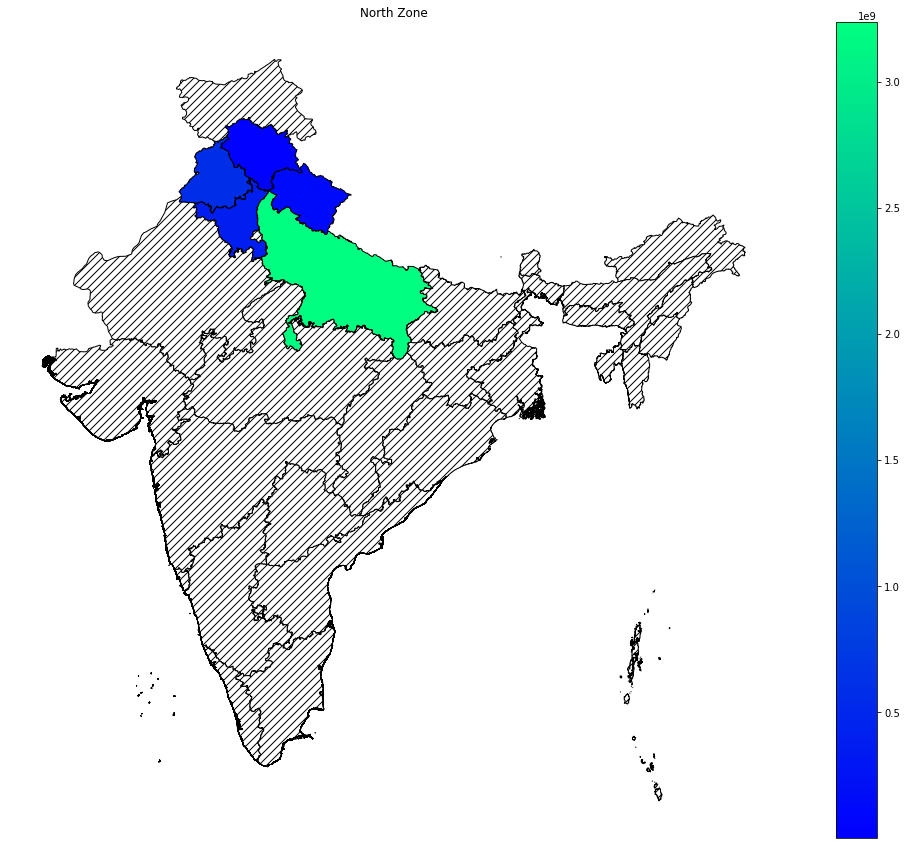

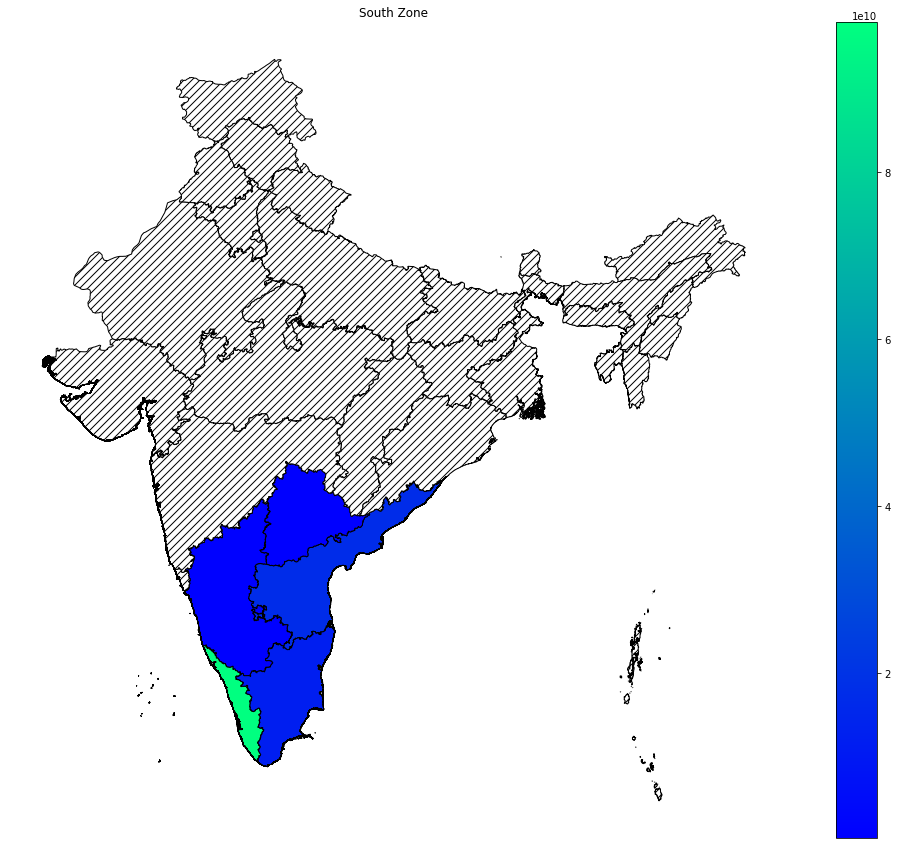

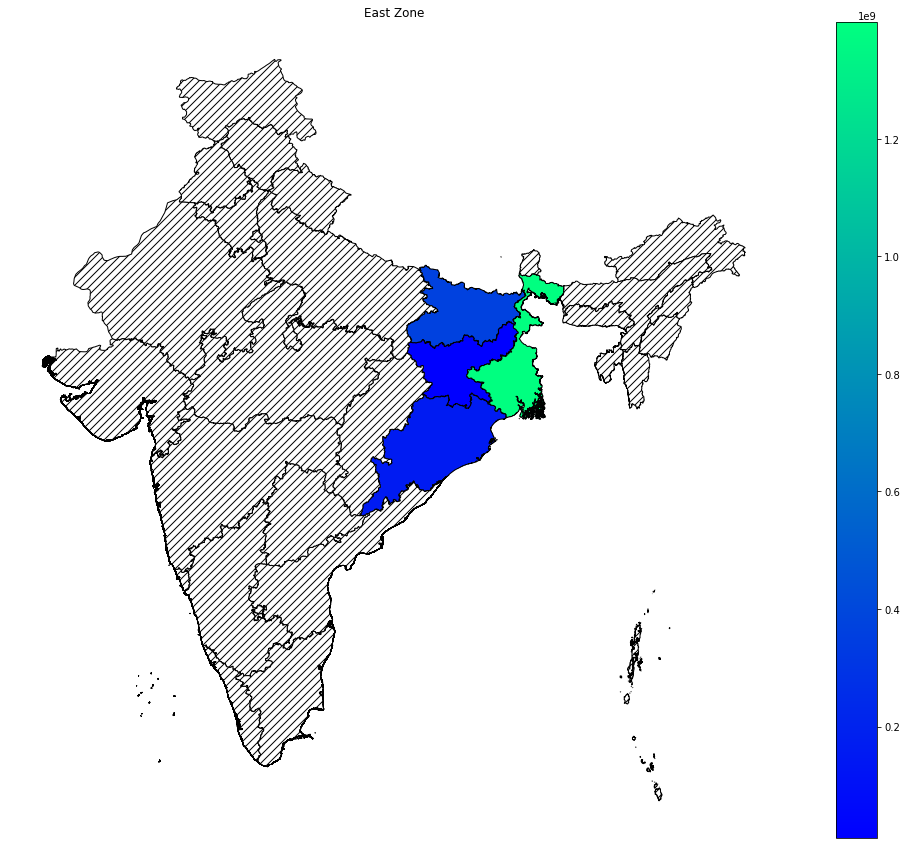

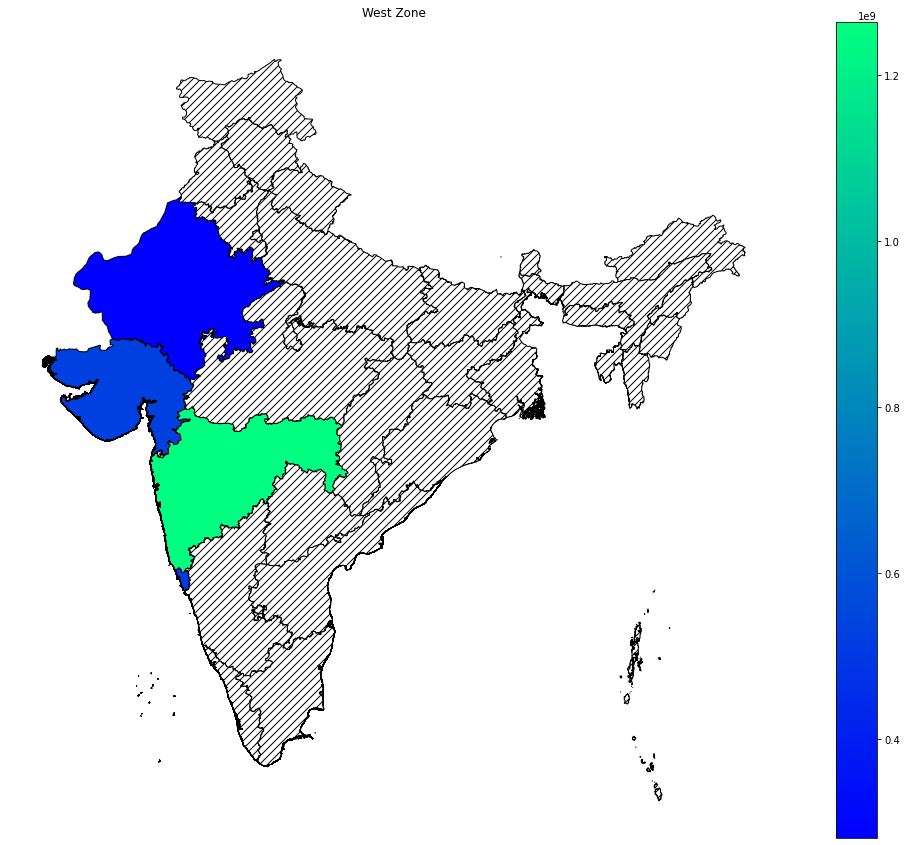

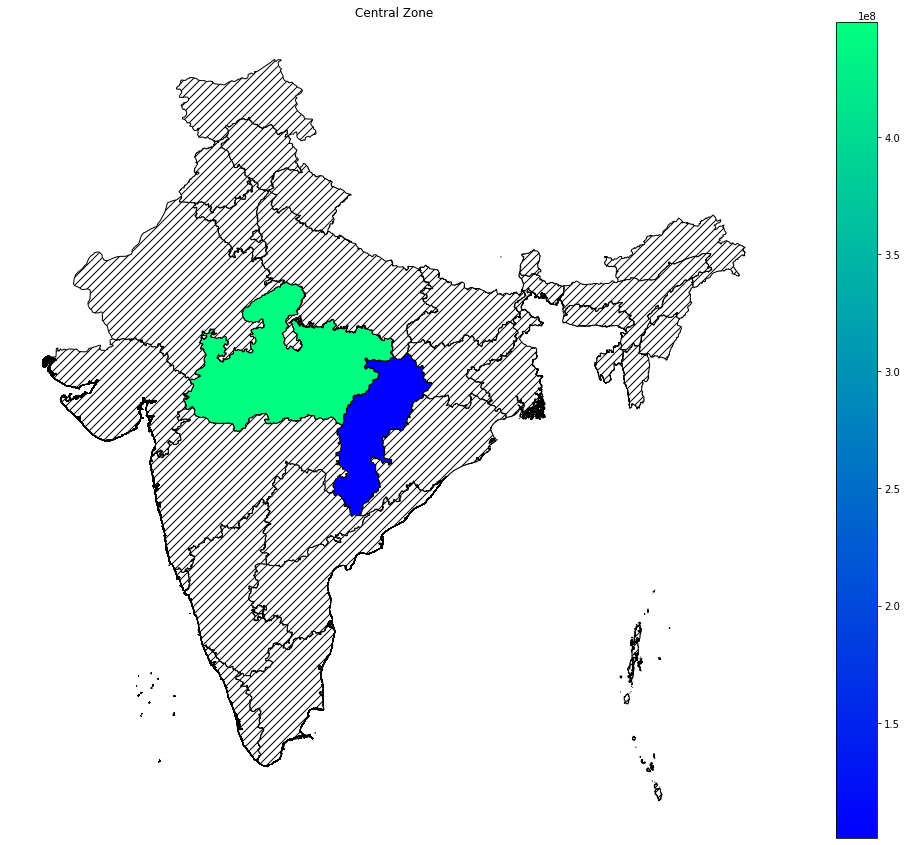

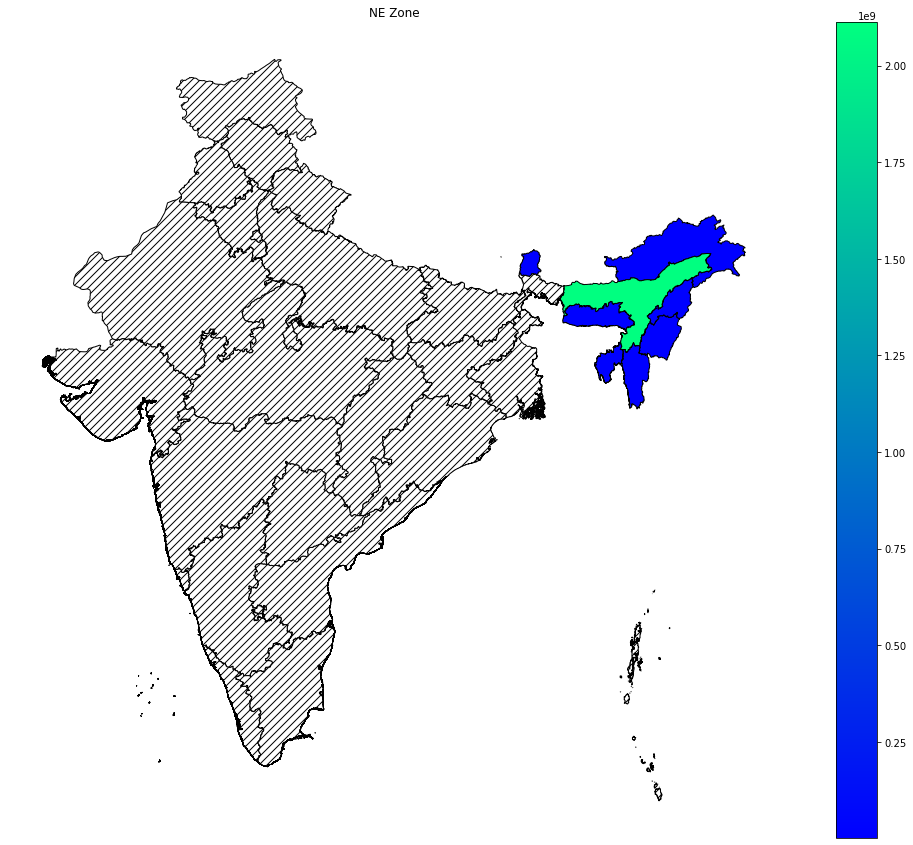

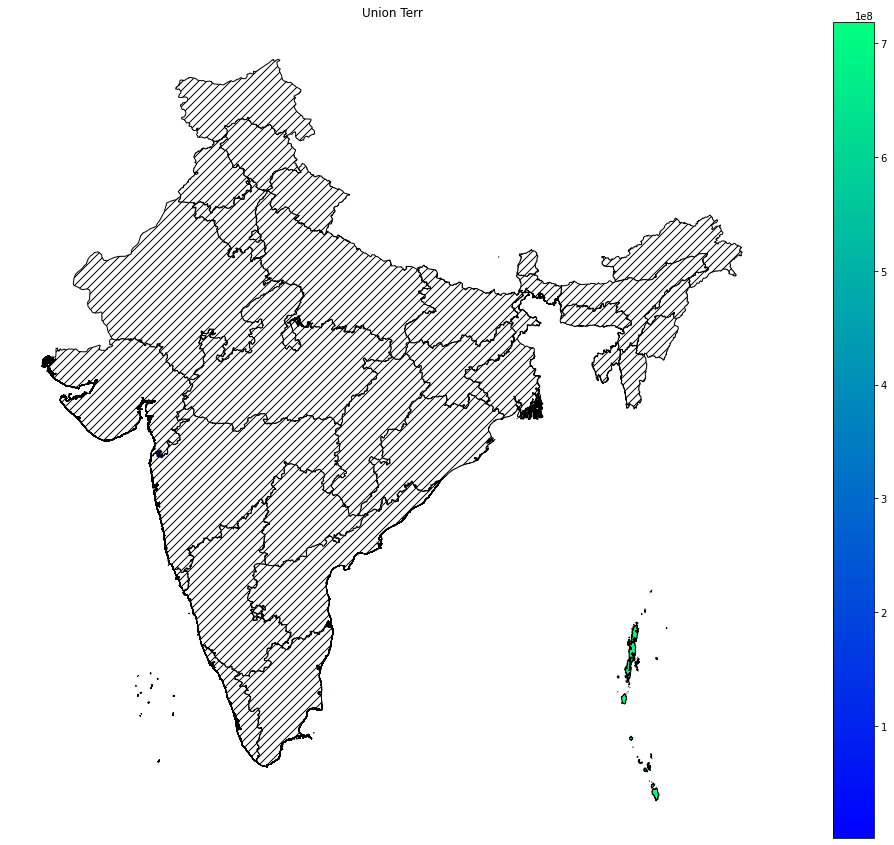

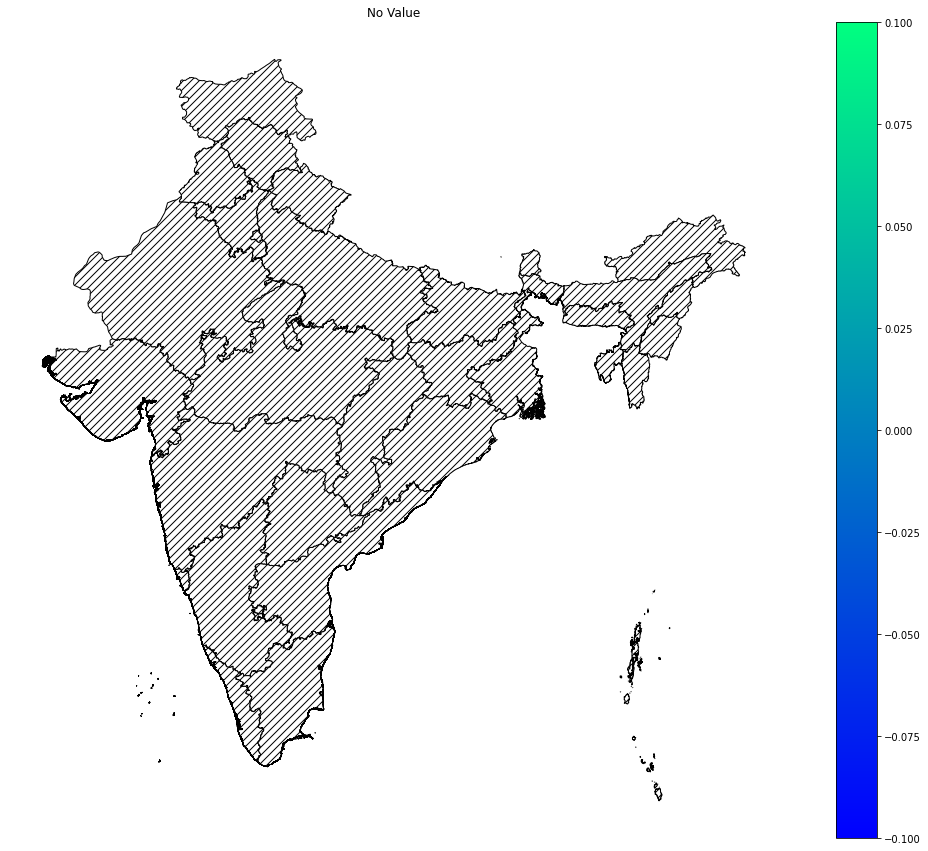

In [120]:
for zone in ZONES:
    temp_df=crop_data[crop_data.Zones==zone]

    foo_df1=temp_df.groupby(by='State_Name')['Production','State_Name'].sum()

    foo_df2=pd.DataFrame({'NAME_1':foo_df1.index,zone:foo_df1.Production})

    merge_df=pd.merge(geo_data,foo_df2,on='NAME_1',how='outer')
    # print(merge_df)
    geo_plot(merge_df,zone)

Observations:
- Top producers of crops in each region:
    - 'North Zone': Uttar Pradesh
    - 'South Zone': Kerela
    - 'East Zone': West bangal
    - 'West Zone': Maharastra
    - 'Central Zone': Madhay Pradesh
    - 'NE Zone': Assam
    - 'Union Terr': Andman and Nicobars
- Most of the result are not new to our intutions. All states that are in top rank has at least one major river[that flows throughout the year] passing through their cultivation zones. 

# Crop-category Analysis

In [106]:
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

crop_data['Cat_Crop']=crop_data['Crop'].apply(cat_crop)


In [102]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Terr,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Union Terr,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Terr,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Terr,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Terr,Nuts


In [103]:
CROP_CATS=[
    'Cereal',
    'Pulses',
    'Fruits',
    'Beans',
    'Vegetables',
    'spices',
    'fibres',
    'Nuts',
    'oilseeds',
    'Commercial'
]

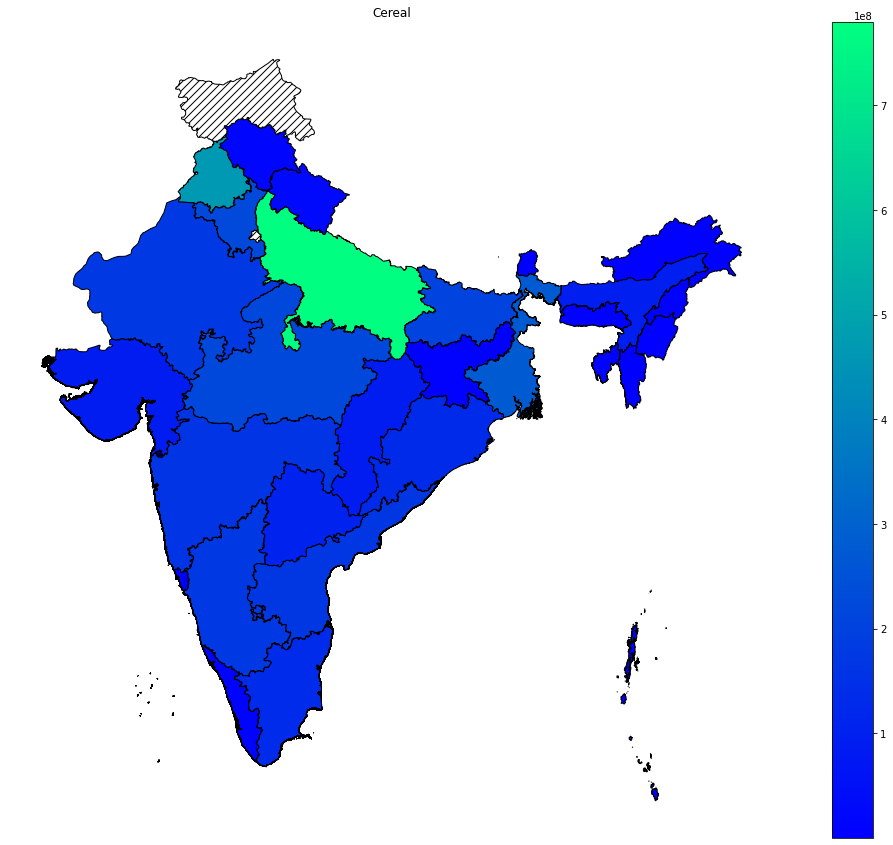

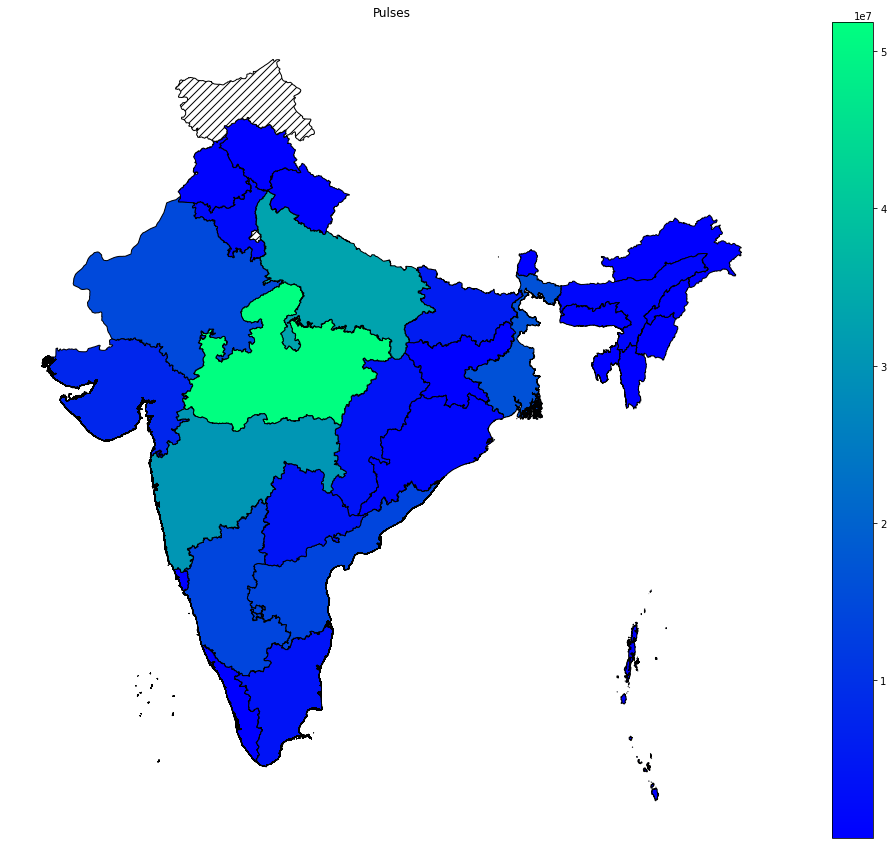

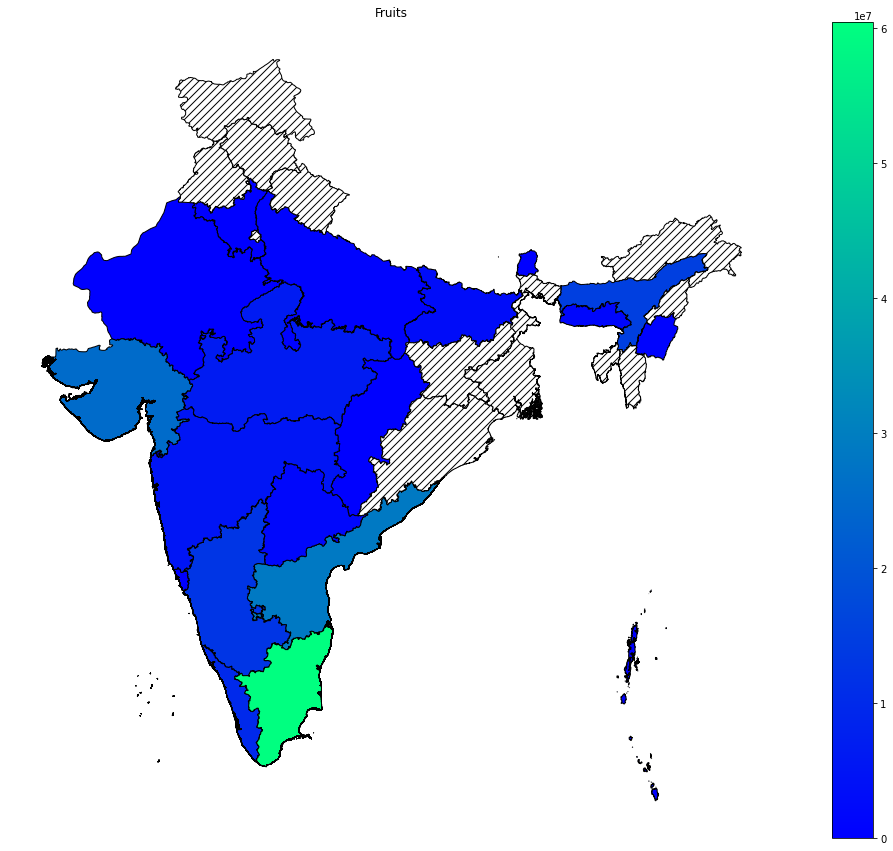

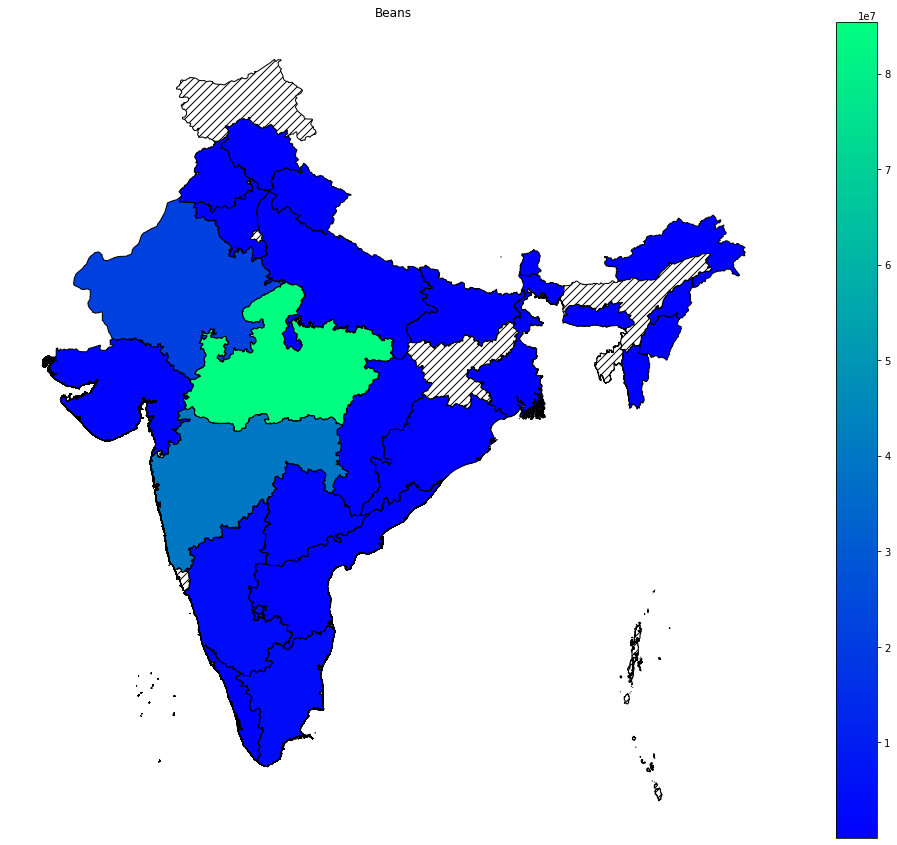

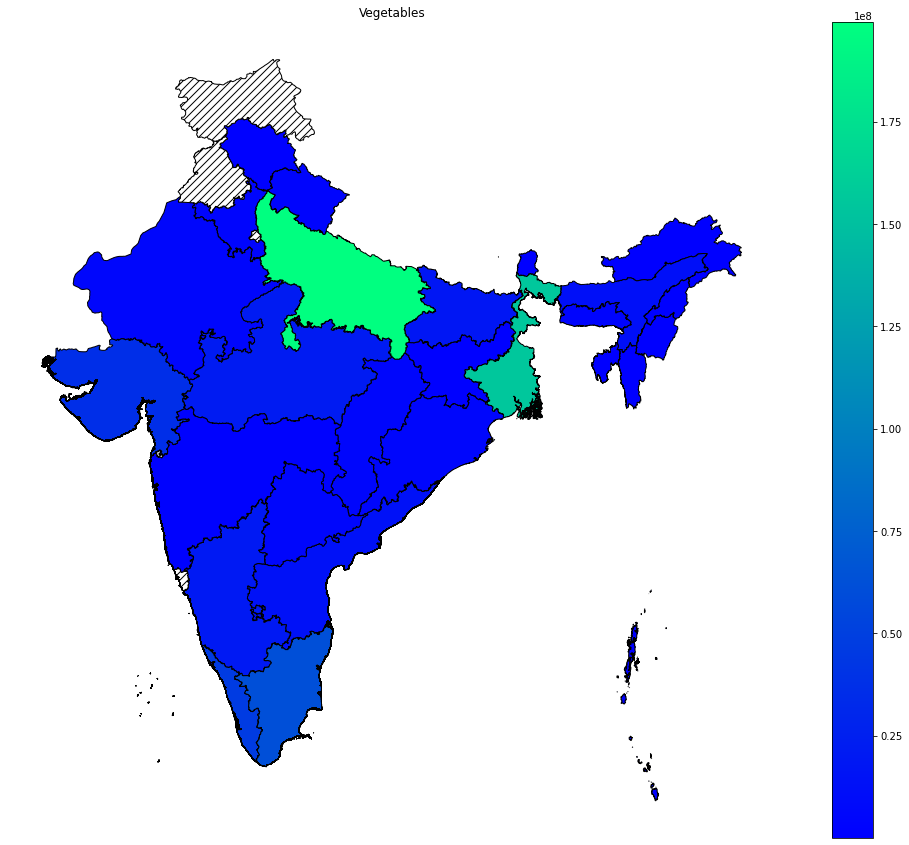

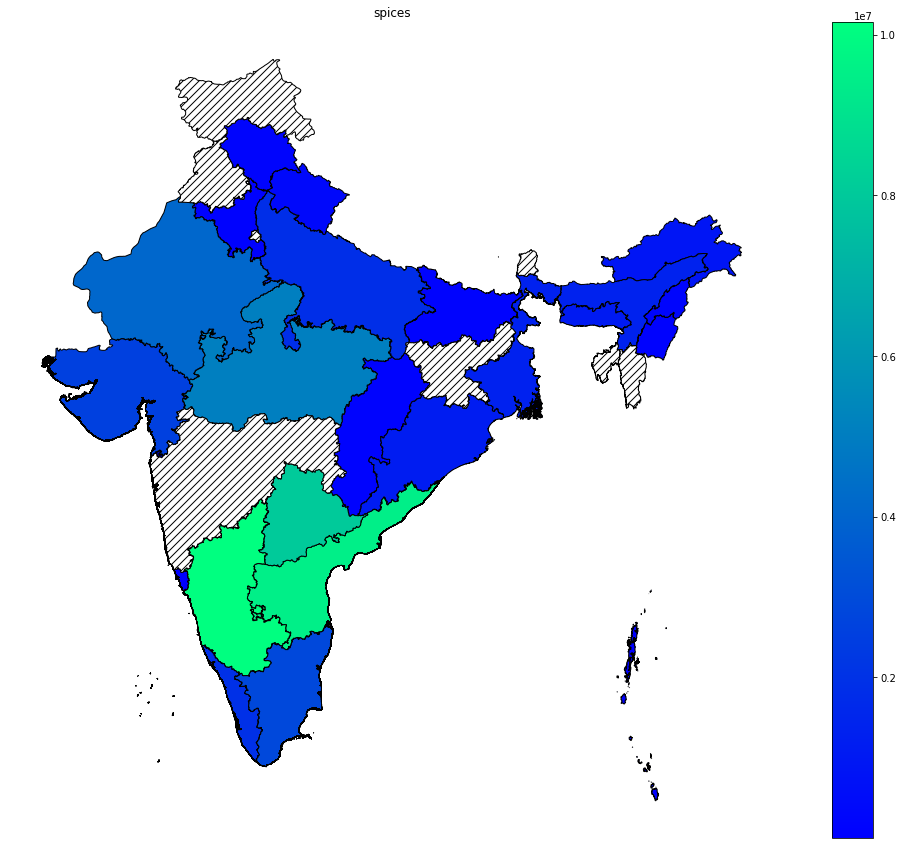

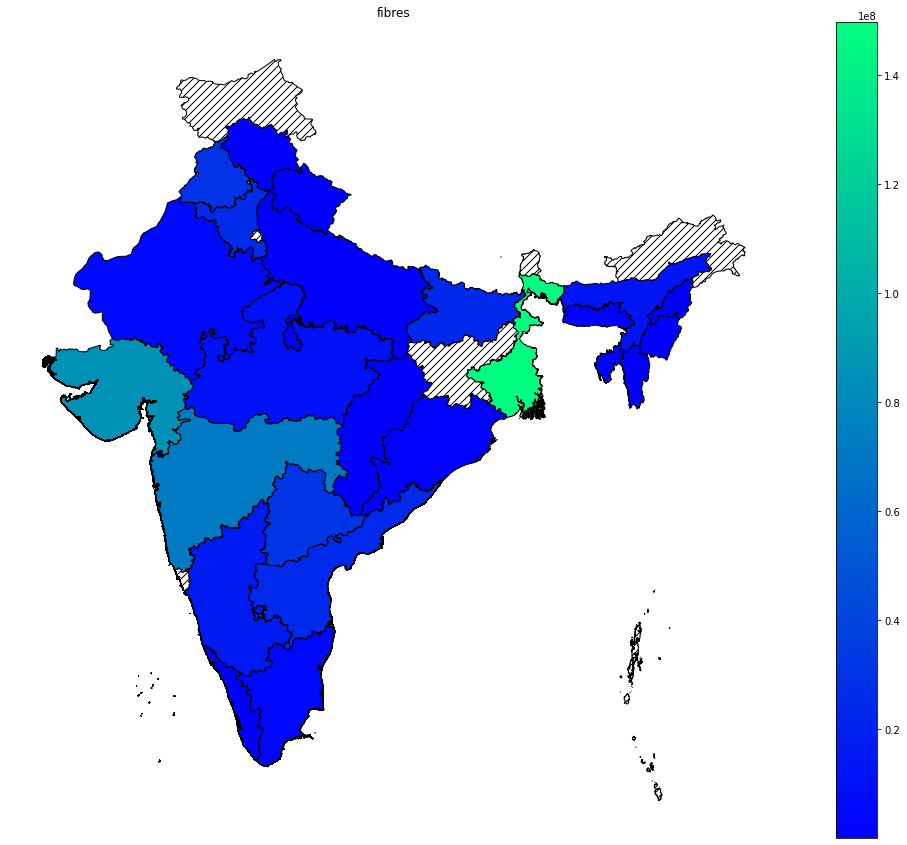

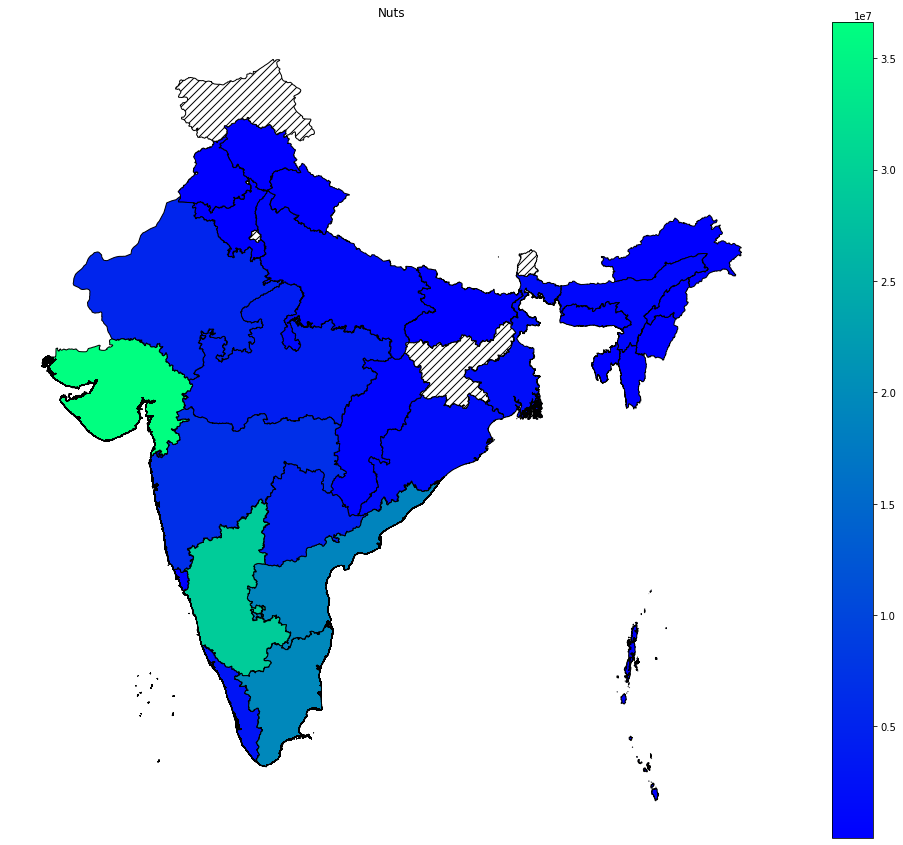

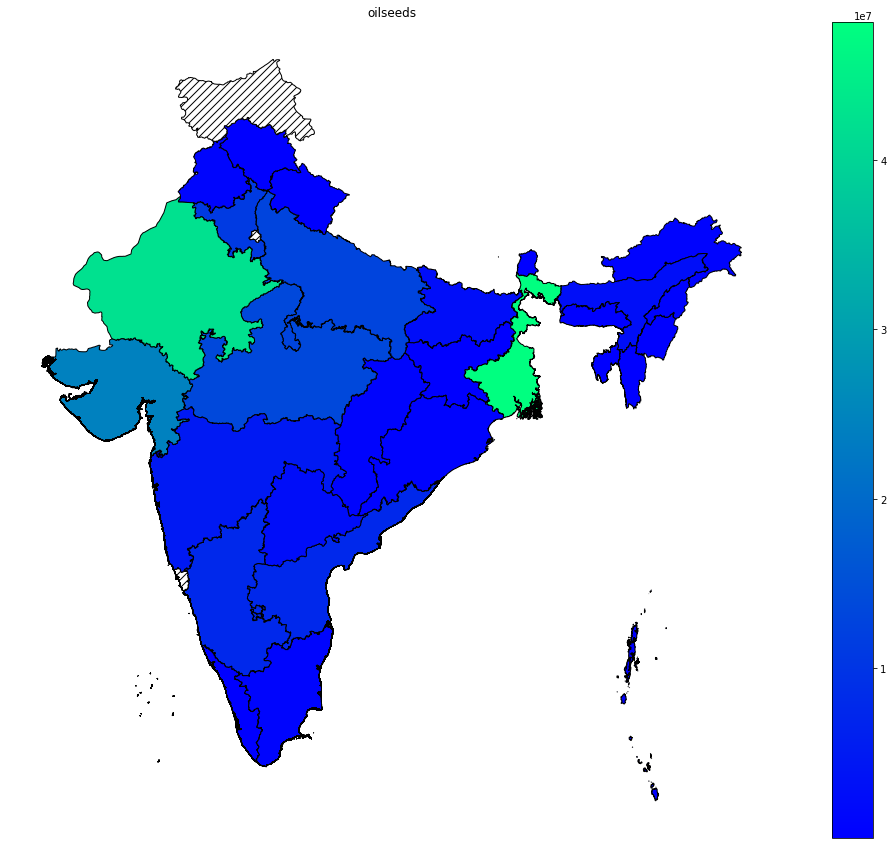

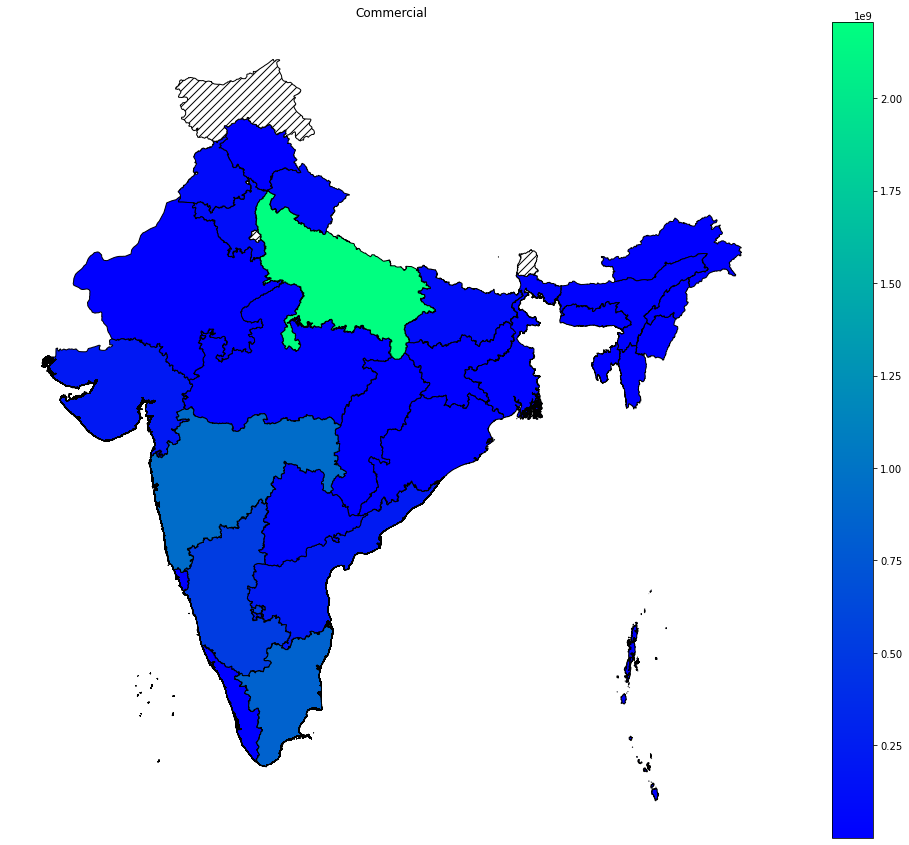

In [107]:
for crop in CROP_CATS:
    temp_df=crop_data[crop_data.Cat_Crop==crop]

    foo_df1=temp_df.groupby(by='State_Name')['Production','State_Name'].sum()

    foo_df2=pd.DataFrame({'NAME_1':foo_df1.index,crop:foo_df1.Production})

    merge_df=pd.merge(geo_data,foo_df2,on='NAME_1',how='outer')

    geo_plot(merge_df,crop)

Observations:
- In oilseeds Rajasthan and WB are top producers over 19 years.
- Gujarat and Karnatka are two top states in the production of Nuts.
- In fibers WB, Gujrat, and Maharastra are top producers over 19 years.
- KT, AP, TG are some top states in the production of Spices.
- In beans MP and MH are top producers over 19 years. There is no beans production data for JH and Assam.
- TamilNadu tops in the production of Fruits.
- In Creals UP, PB and HR are some top producers over 19 years.
- In Pulses MP, UP, and MH are some top producers over 19 years.
- UP and Wb are two top states in the production of Vegetables.
- UttarPradesh tops in the production of commercial crops.

# Specific crop analysis

In [124]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop,Cat_Crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Terr,Nuts,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Union Terr,Pulses,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Terr,Cereal,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Terr,Fruits,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Terr,Nuts,Nuts


- we want to know which state has how much crop production of major crops, specifically:
    - Rice
    - Wheat
    - Paddy

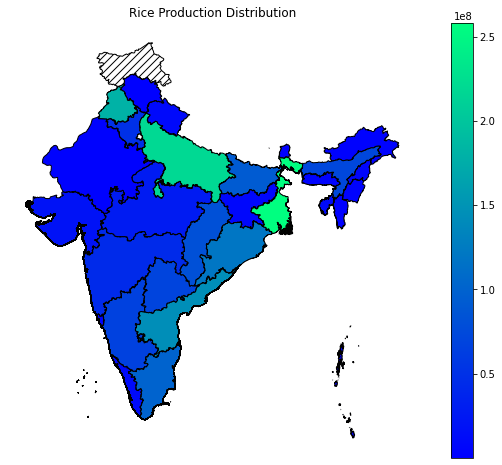

In [128]:
rice_df=crop_data[crop_data.Crop=='Rice']

foo_df1=rice_df.groupby(by='State_Name')['Production','State_Name'].sum()

foo_df2=pd.DataFrame({'NAME_1':foo_df1.index,'Rice Production Distribution':foo_df1.Production})

merge_df=pd.merge(geo_data,foo_df2,on='NAME_1',how='outer')

geo_plot(merge_df,'Rice Production Distribution')

Observatoins:
- States in North and East specifically Uttar Pradesh, West Bengal, Punjab and Andra Pradesh are top producers of Rice in India over 19 years(1997-2015)

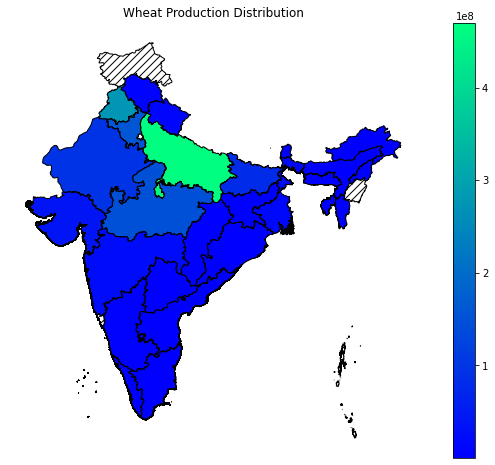

In [129]:
Wheat_df=crop_data[crop_data.Crop=='Wheat']

foo_df1=Wheat_df.groupby(by='State_Name')['Production','State_Name'].sum()

foo_df2=pd.DataFrame({'NAME_1':foo_df1.index,'Wheat Production Distribution':foo_df1.Production})

merge_df=pd.merge(geo_data,foo_df2,on='NAME_1',how='outer')

geo_plot(merge_df,'Wheat Production Distribution')

Observatoins:
- States in North specifically Uttar Pradesh, Punjab and Hariyana are top producers of Wheat in India over 19 years(1997-2015)

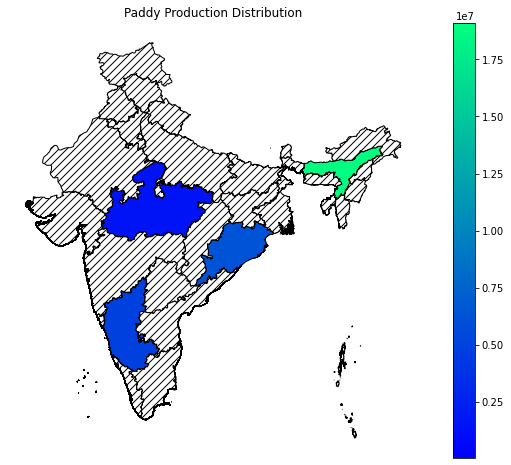

In [130]:
Paddy_df=crop_data[crop_data.Crop=='Paddy']

foo_df1=Paddy_df.groupby(by='State_Name')['Production','State_Name'].sum()

foo_df2=pd.DataFrame({'NAME_1':foo_df1.index,'Paddy Production Distribution':foo_df1.Production})

merge_df=pd.merge(geo_data,foo_df2,on='NAME_1',how='outer')

geo_plot(merge_df,'Paddy Production Distribution')

Observatoins:
- There are only four states that produce Paddy and Assam is the top producer of Paddy in India over 19 years(1997-2015)

Future Work:
- We can explore each zone seperatly on deeper level, meaning on district level.
- After predicting missing production values we can re-explore entire file with those points included. Although it shall not make much difference.
- Each crop category can be analysed seperatly to see which crop dominates a particular crop category.